In [1]:
import tensorflow as tf
import numpy as np
import os, json, glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dir_dataset = "/mnt/nas/PYUSCT_train/dataset002/"

### 教師データのサンプル可視化

In [3]:
input_dataset = sorted(glob.glob( os.path.join(dir_dataset, "input/*.npy")))
output_dataset = sorted(glob.glob( os.path.join(dir_dataset, "output/*.npy")))

assert len(input_dataset) == len(output_dataset)
len(input_dataset)

10000

9629


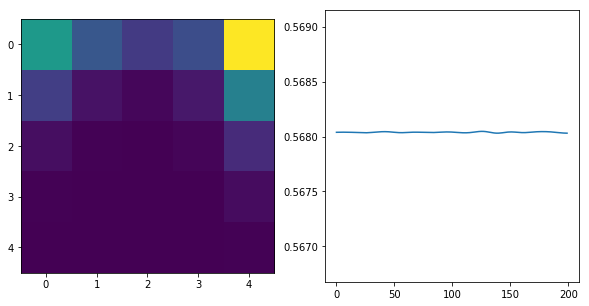

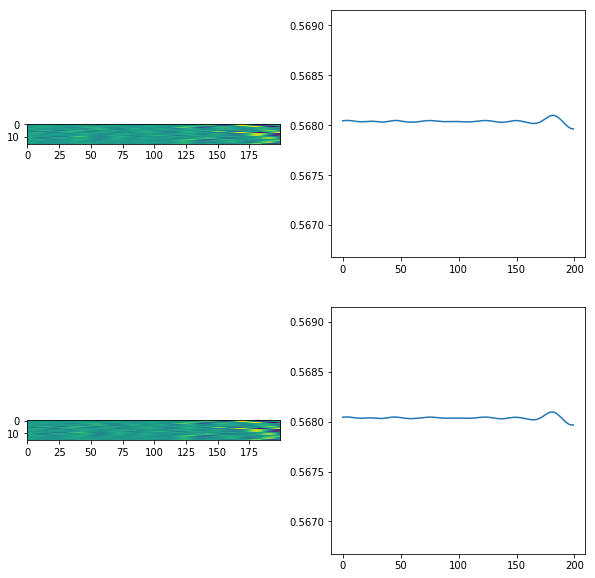

8791


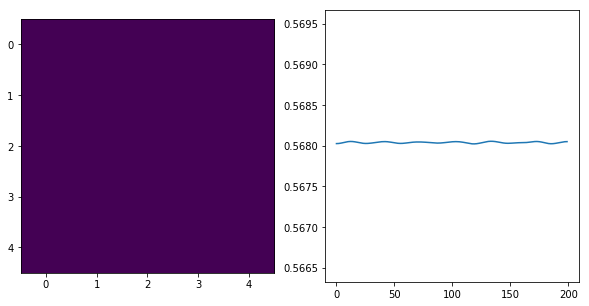

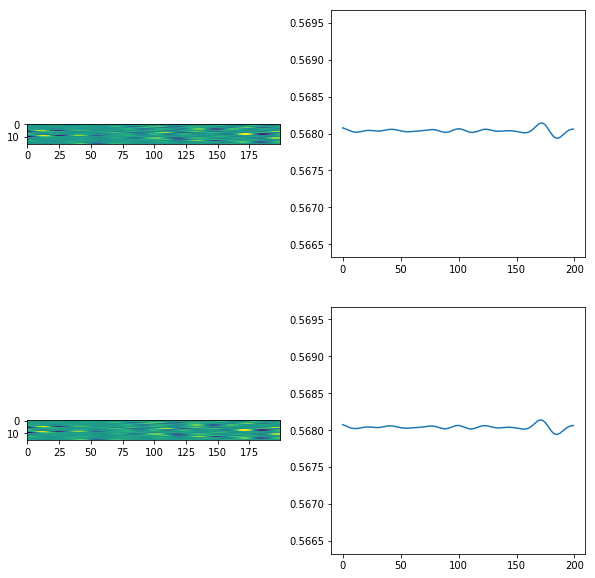

7584


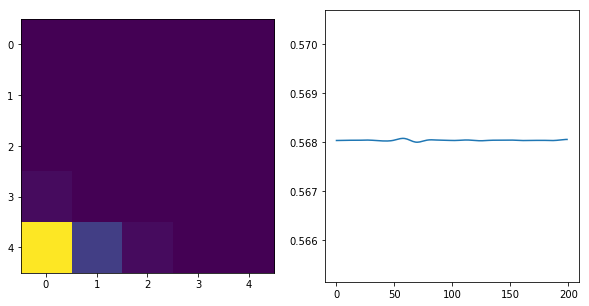

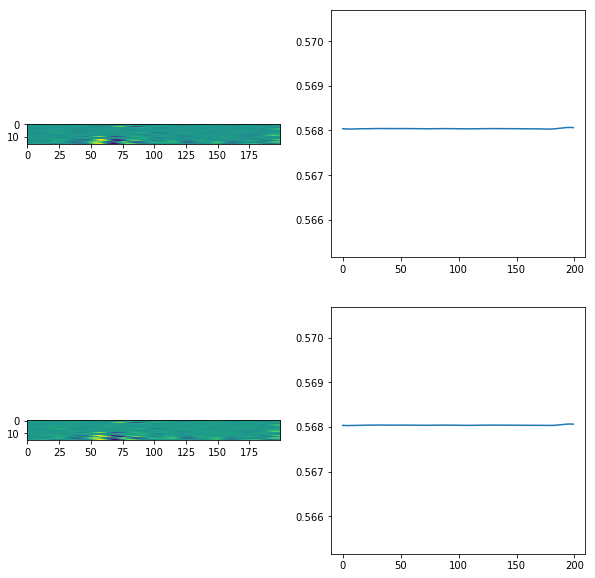

7975


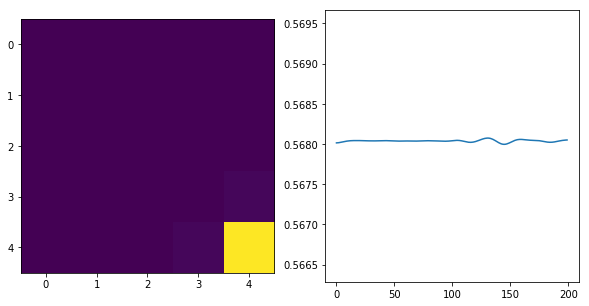

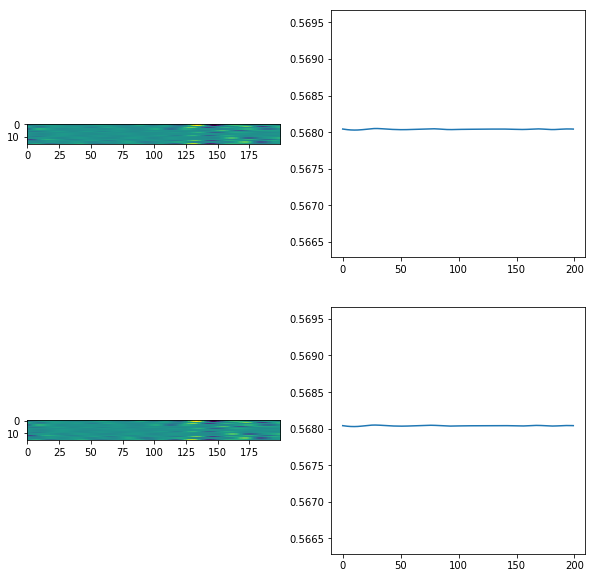

In [11]:
for _ in range(4):

    i = np.random.randint(0, len(input_dataset)-1)
    print(i)
    

    input_sample = np.load(input_dataset[i])
    output_sample = np.load(output_dataset[i])
    
    input_sample = input_sample[:,::16,:]
    input_sample += (input_sample<np.mean(input_sample)*0.5) * np.mean(input_sample)    

    
    T, R, L = input_sample.shape
    _vmax = input_sample.max()
    _vmin = input_sample.min()

    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.imshow(output_sample, interpolation='nearest')

    plt.subplot(1,2,2)
    plt.plot(np.mean(np.mean(input_sample, axis=0), axis=0))
    plt.ylim([_vmin, _vmax])
    
    plt.show()

    plt.figure(figsize=(10,10))

    plt.subplot(2,2,1)
    plt.imshow(np.mean(input_sample, axis=0), interpolation='nearest')
#     plt.colorbar()
    plt.subplot(2,2,2)
    plt.plot(np.mean(input_sample, axis=0)[R//2,:])
    plt.ylim([_vmin, _vmax])


    plt.subplot(2,2,3)
    plt.imshow(np.mean(input_sample, axis=1), interpolation='nearest')
#     plt.colorbar()
    plt.subplot(2,2,4)
    plt.plot(np.mean(input_sample, axis=1)[T//2,:])
    plt.ylim([_vmin, _vmax])

    plt.show()



### 教師データ入出力画像を保存

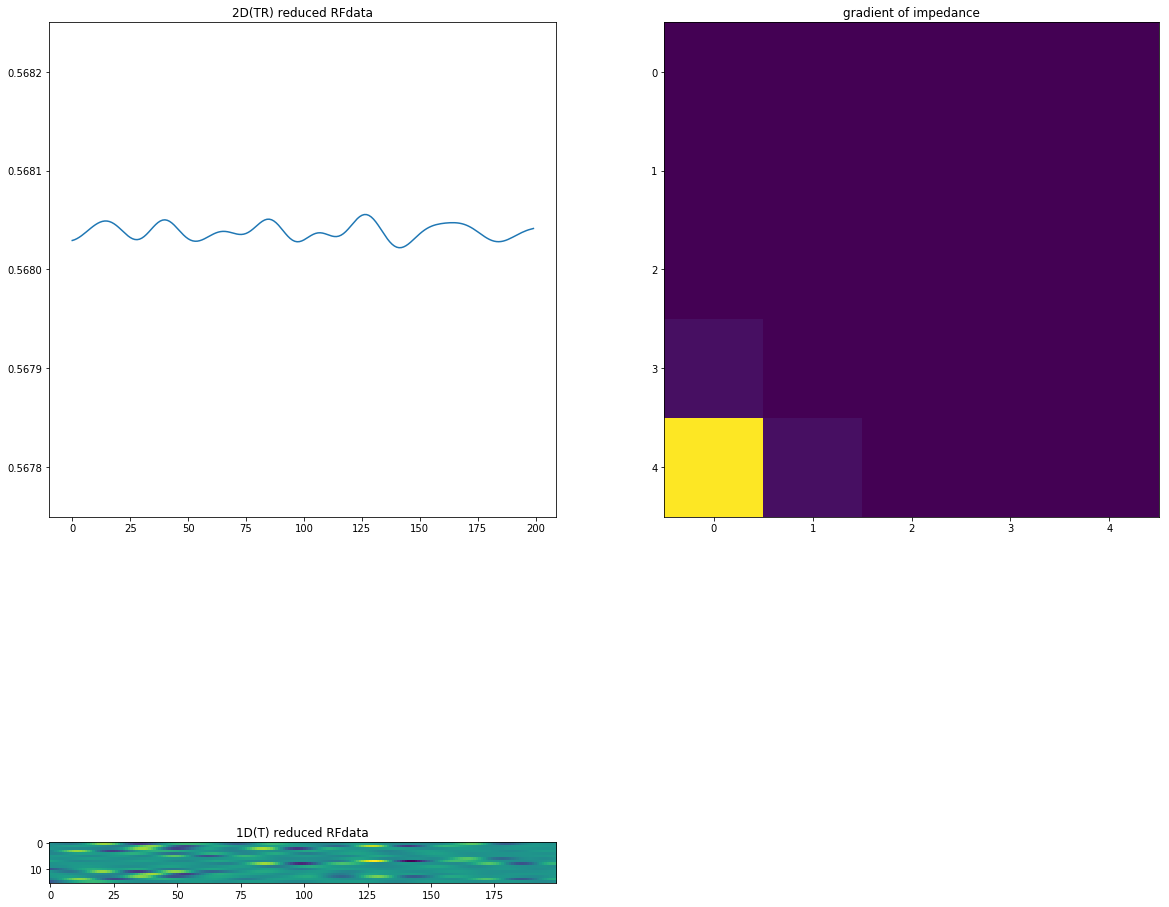

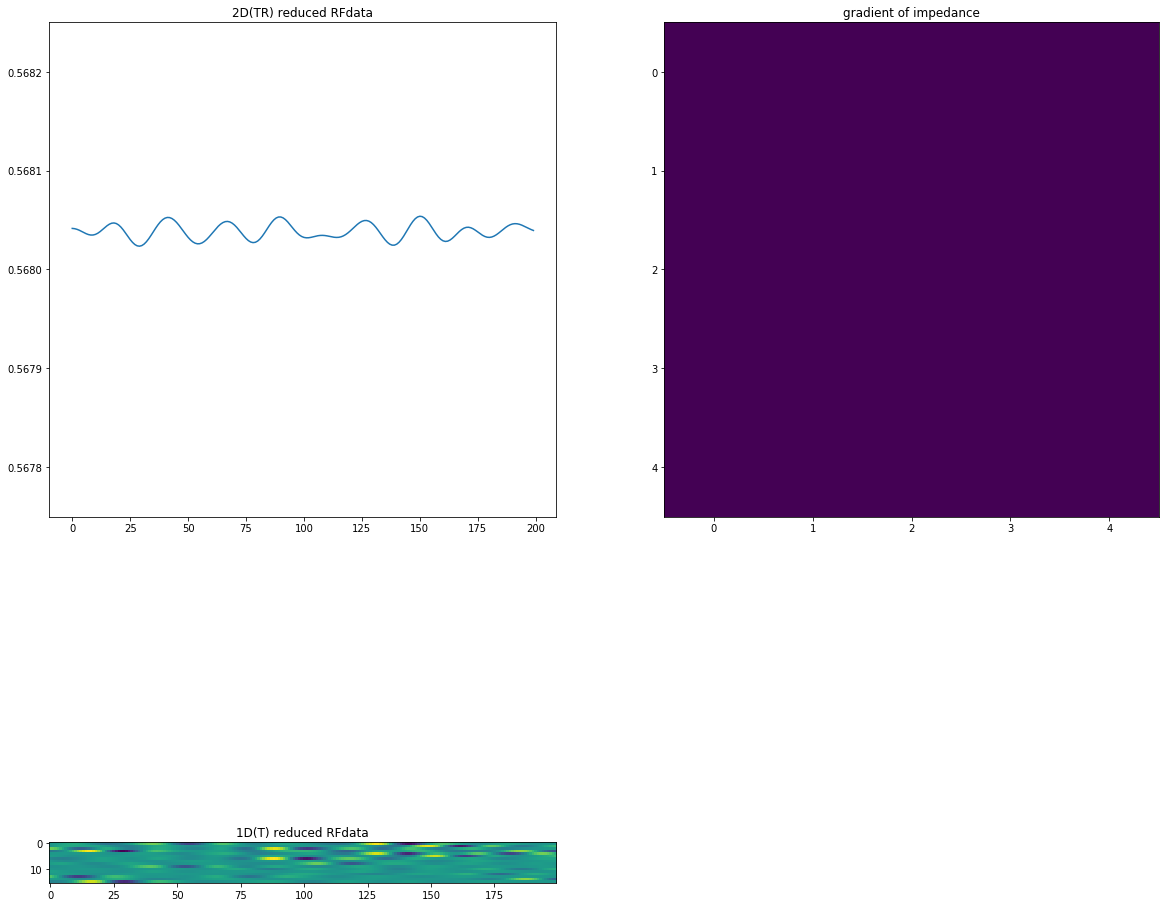

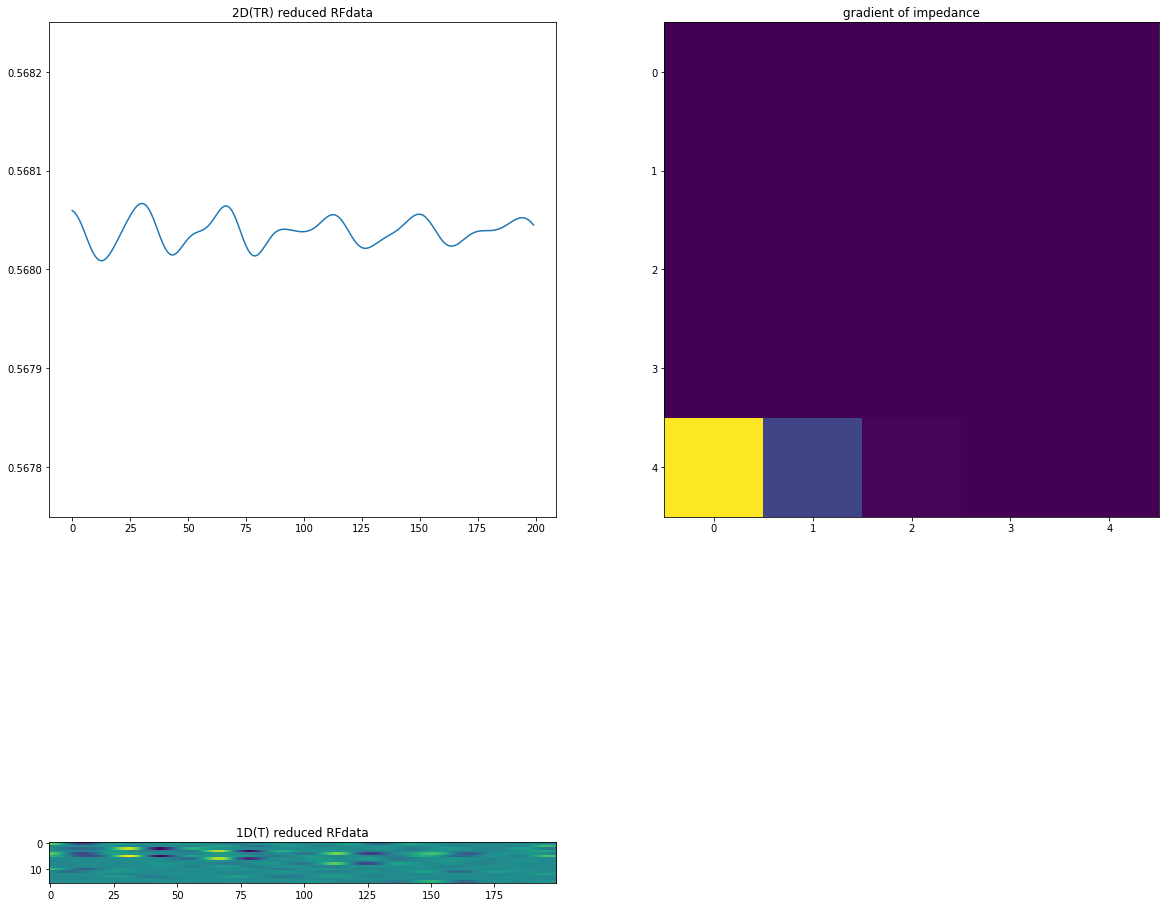

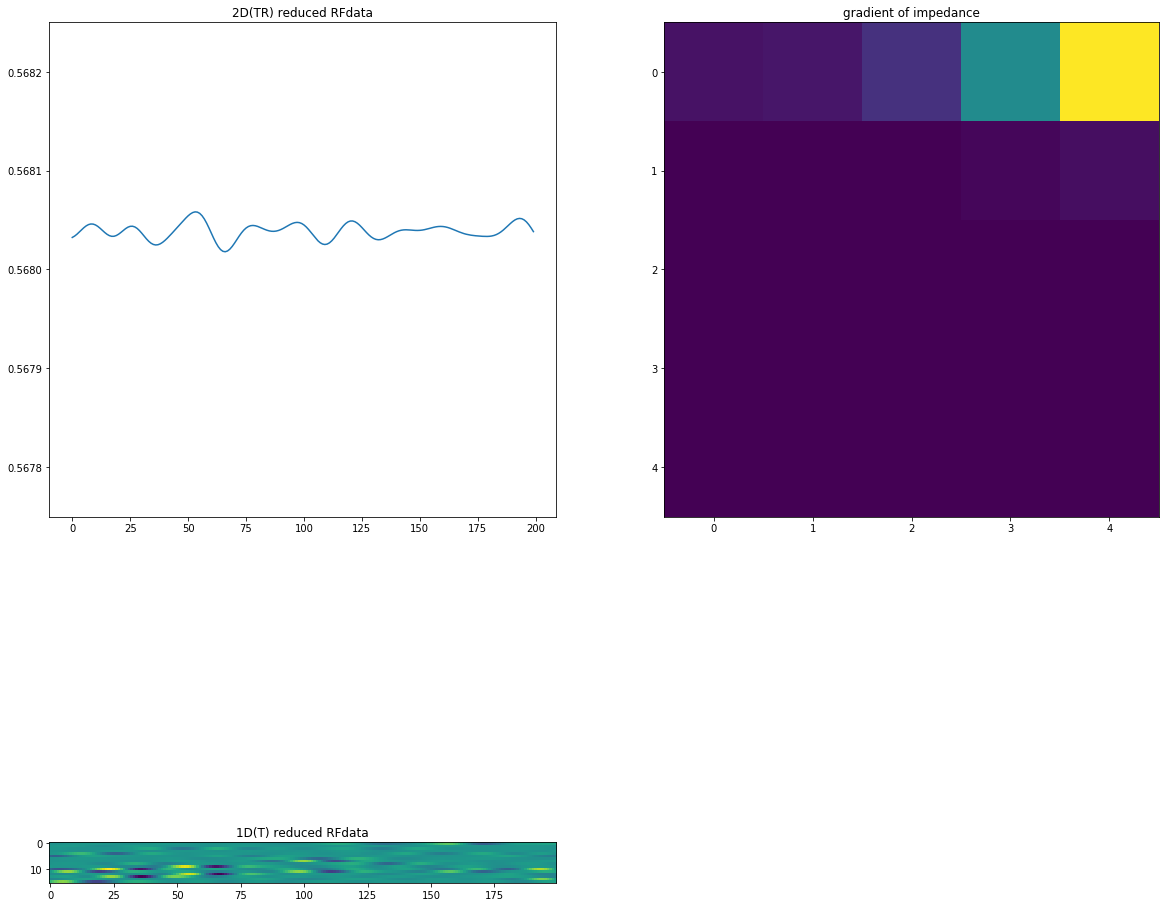

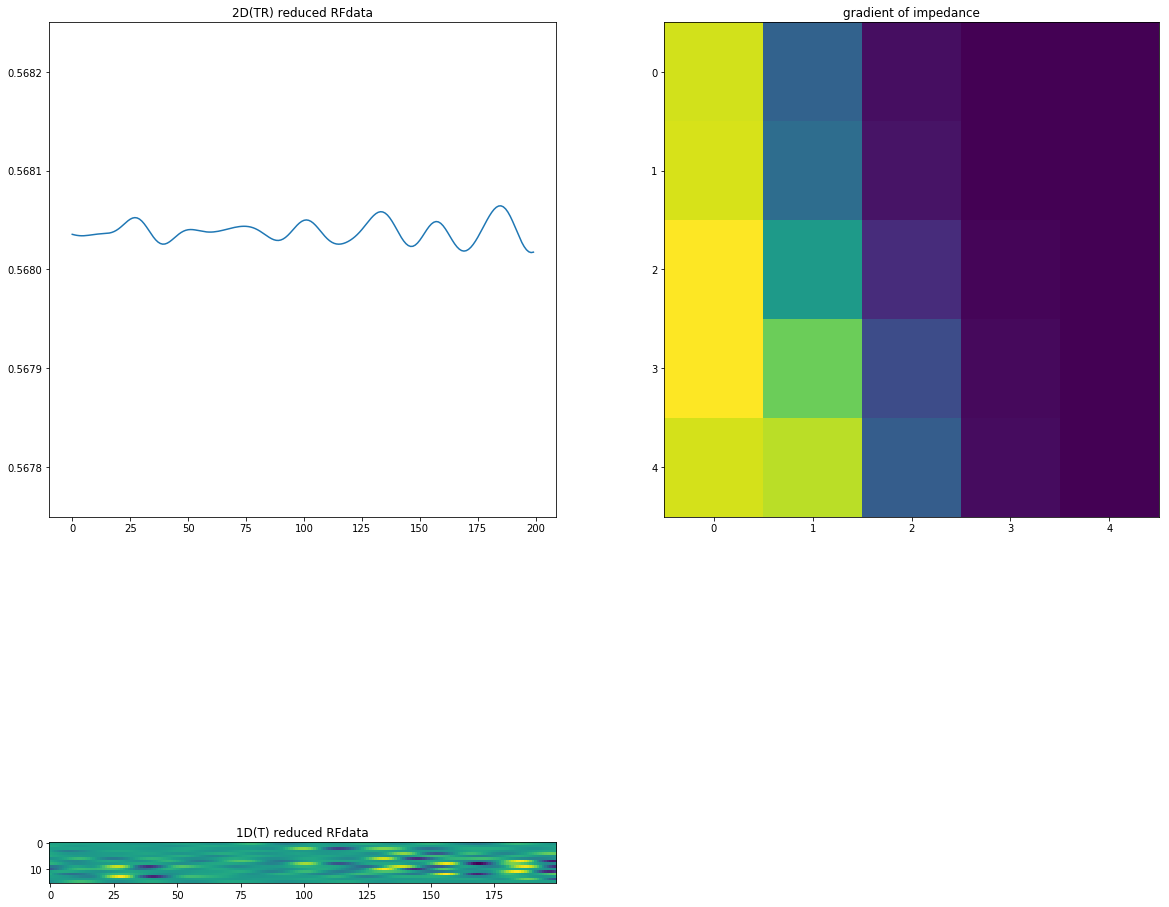

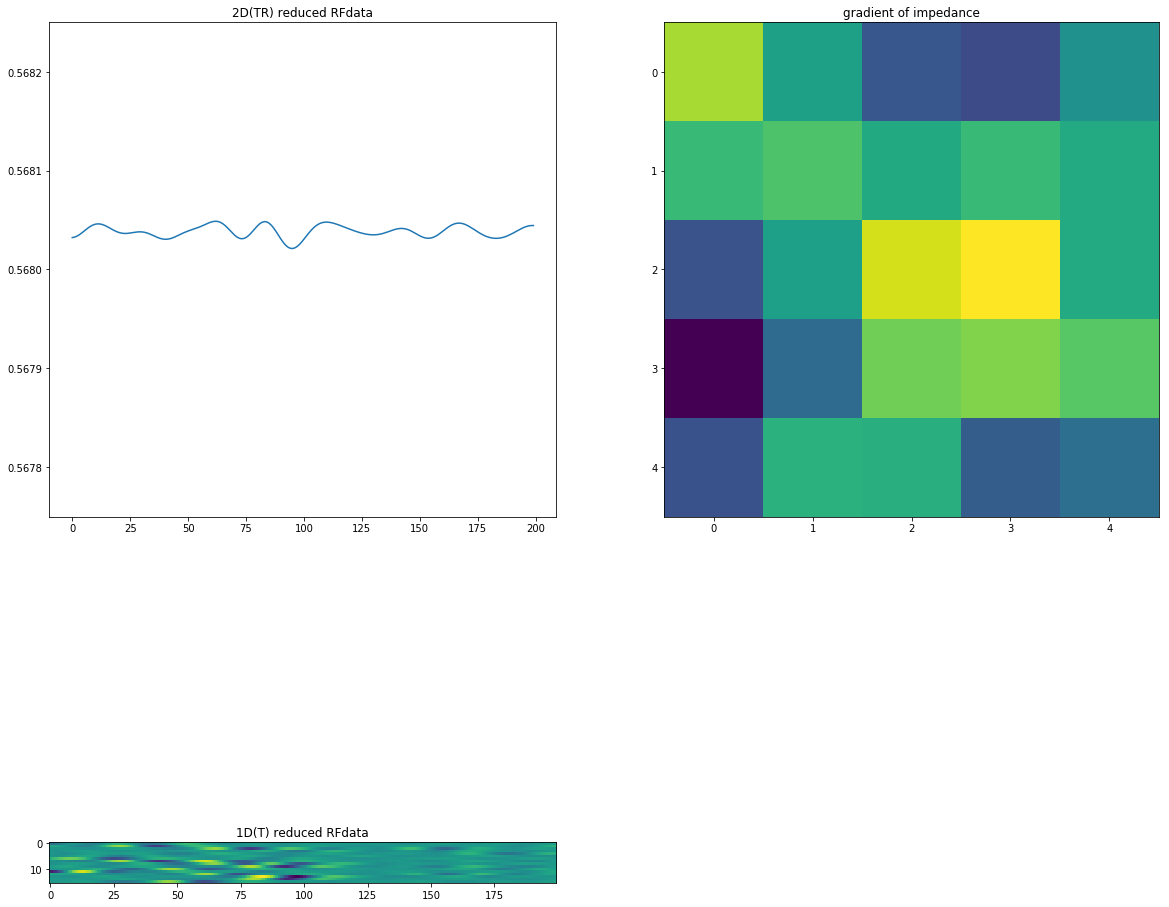

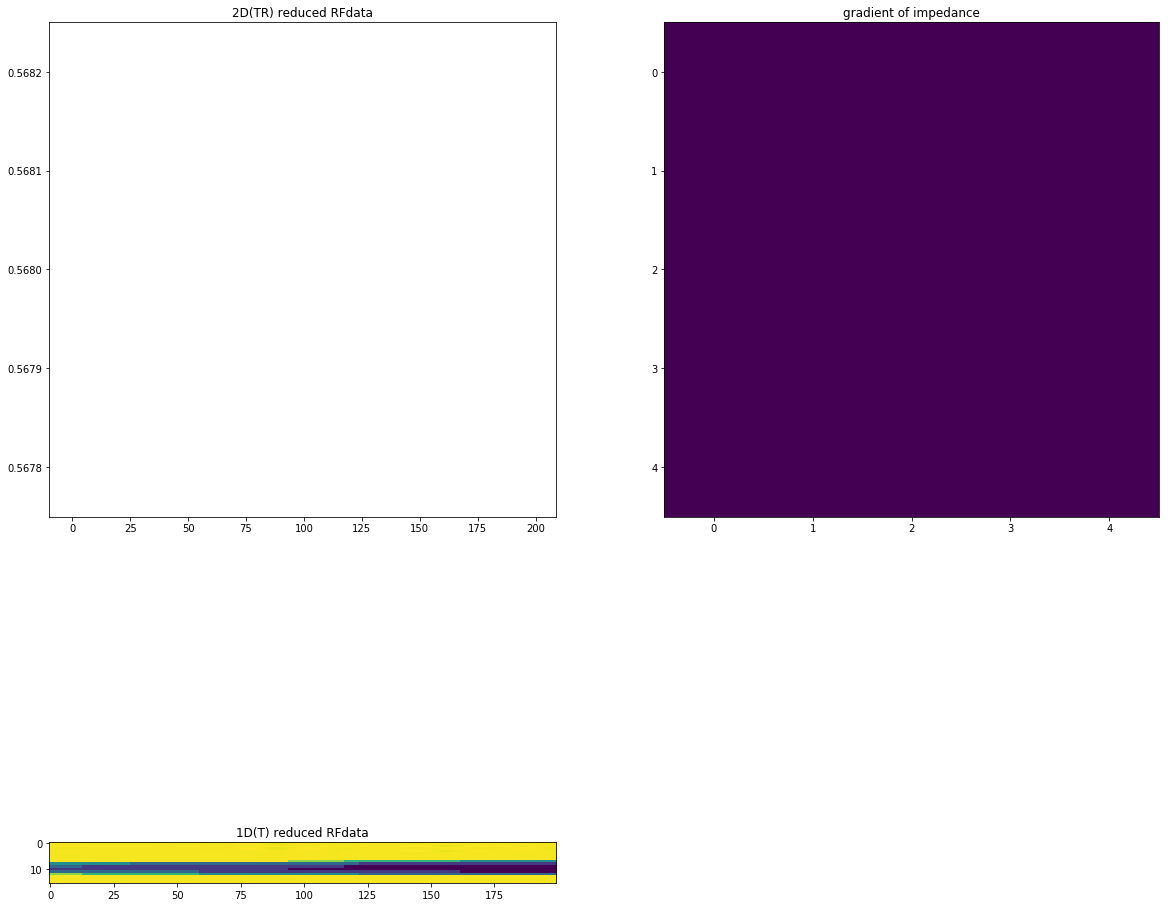

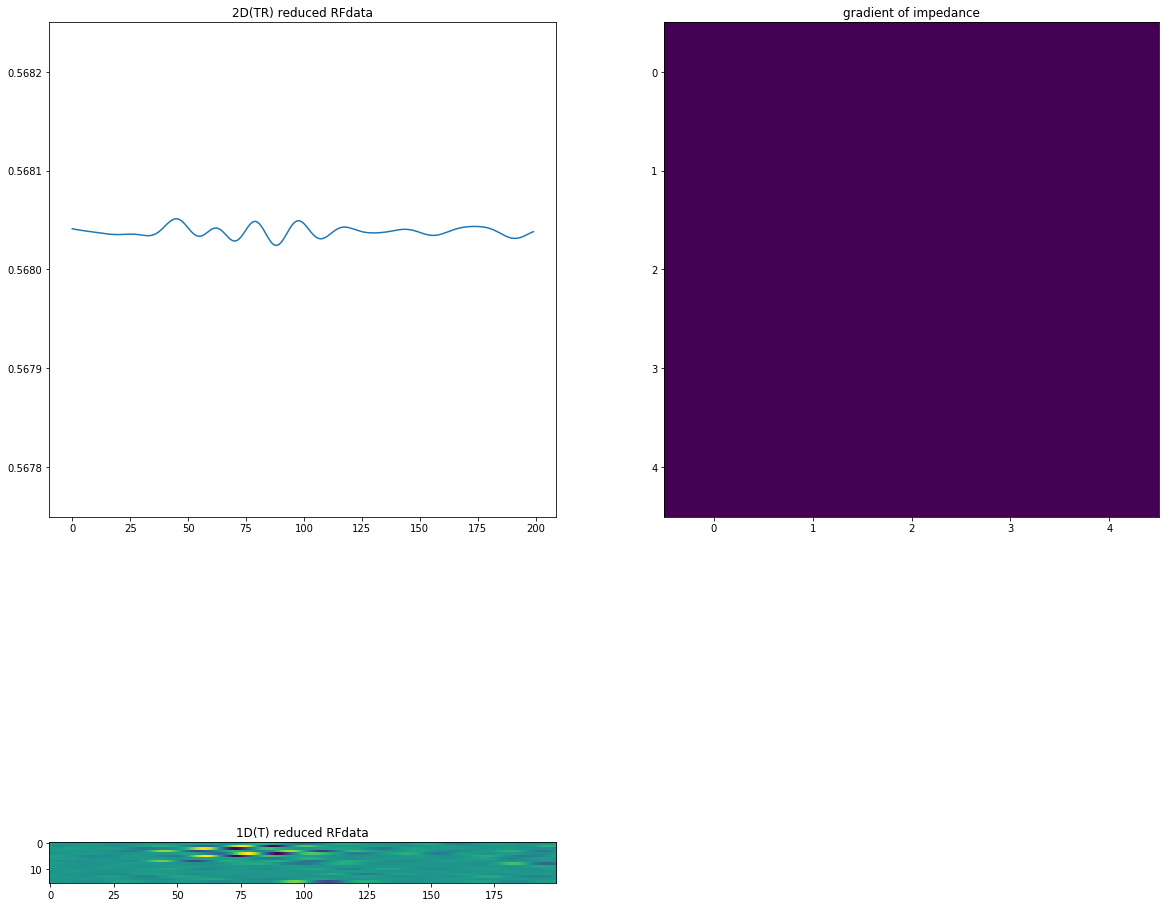

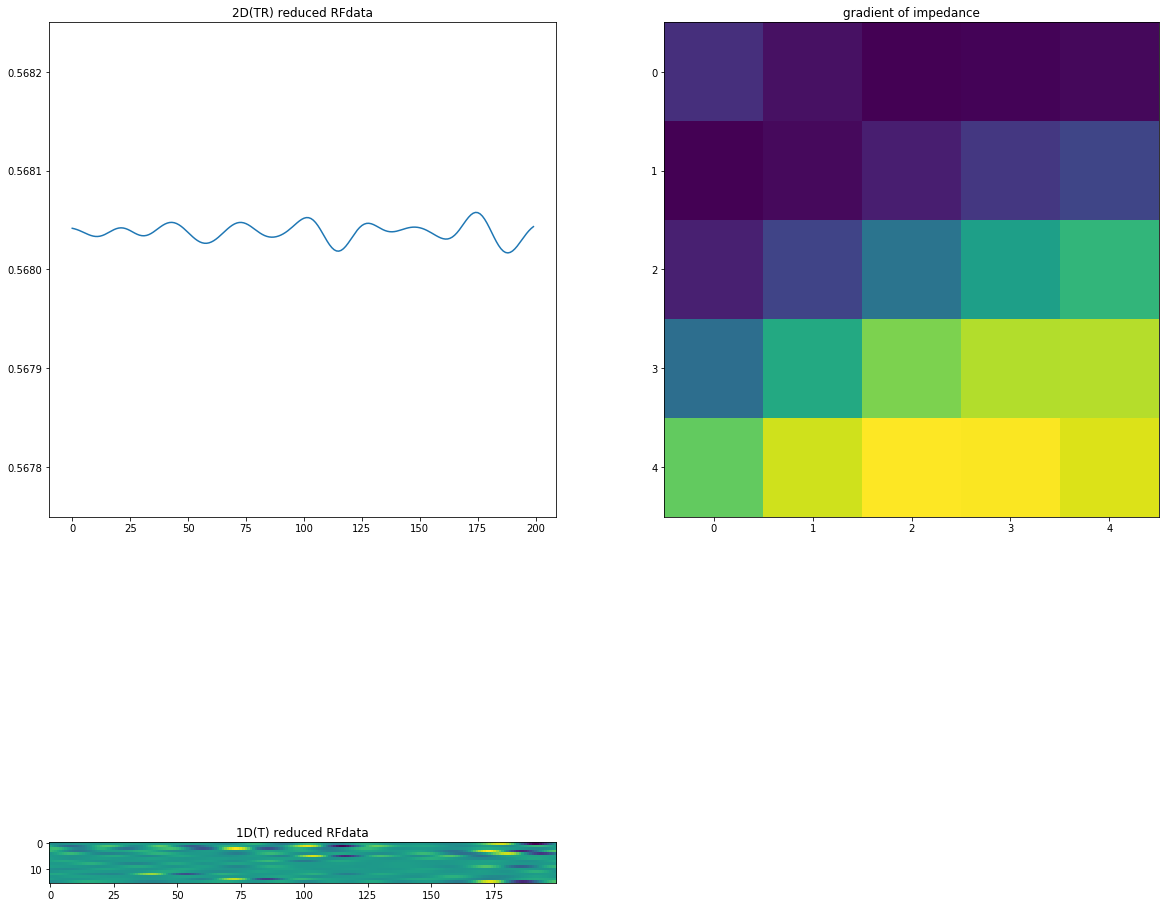

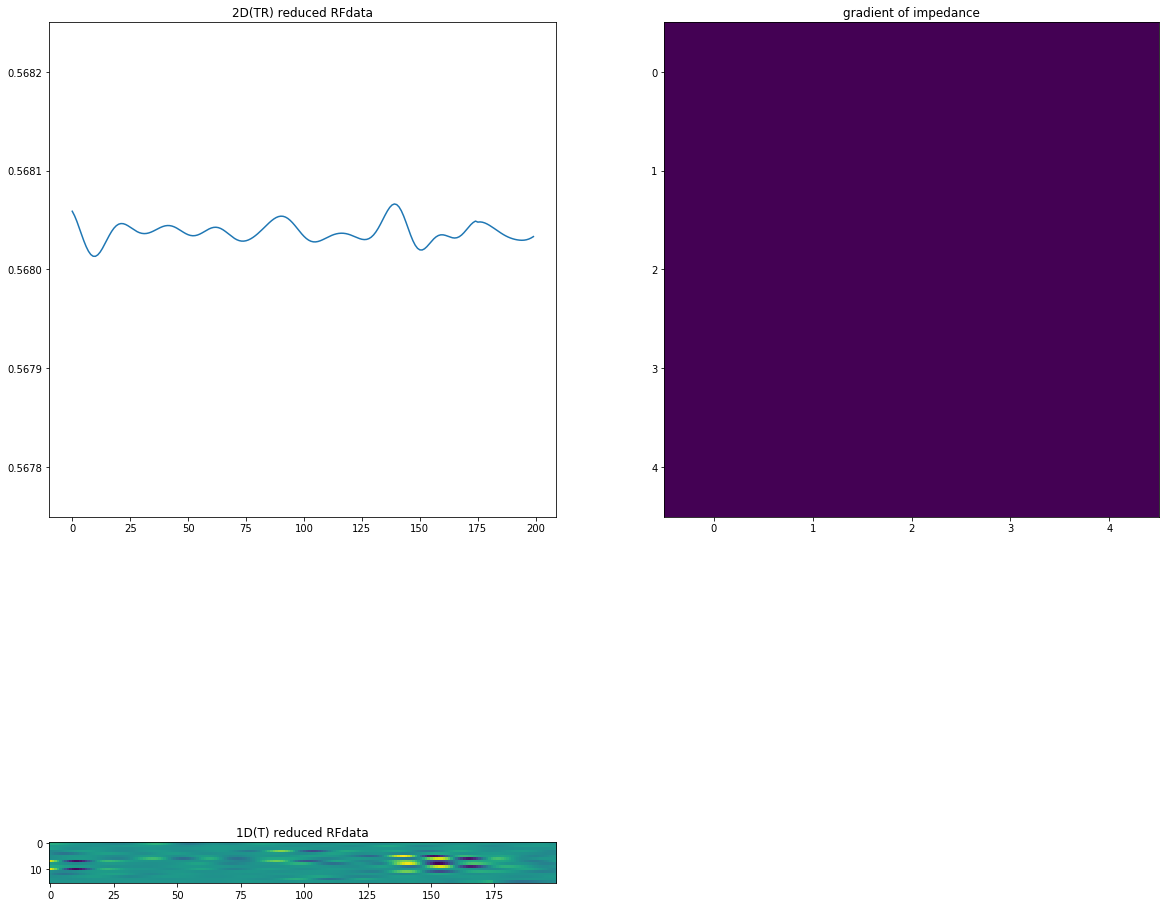

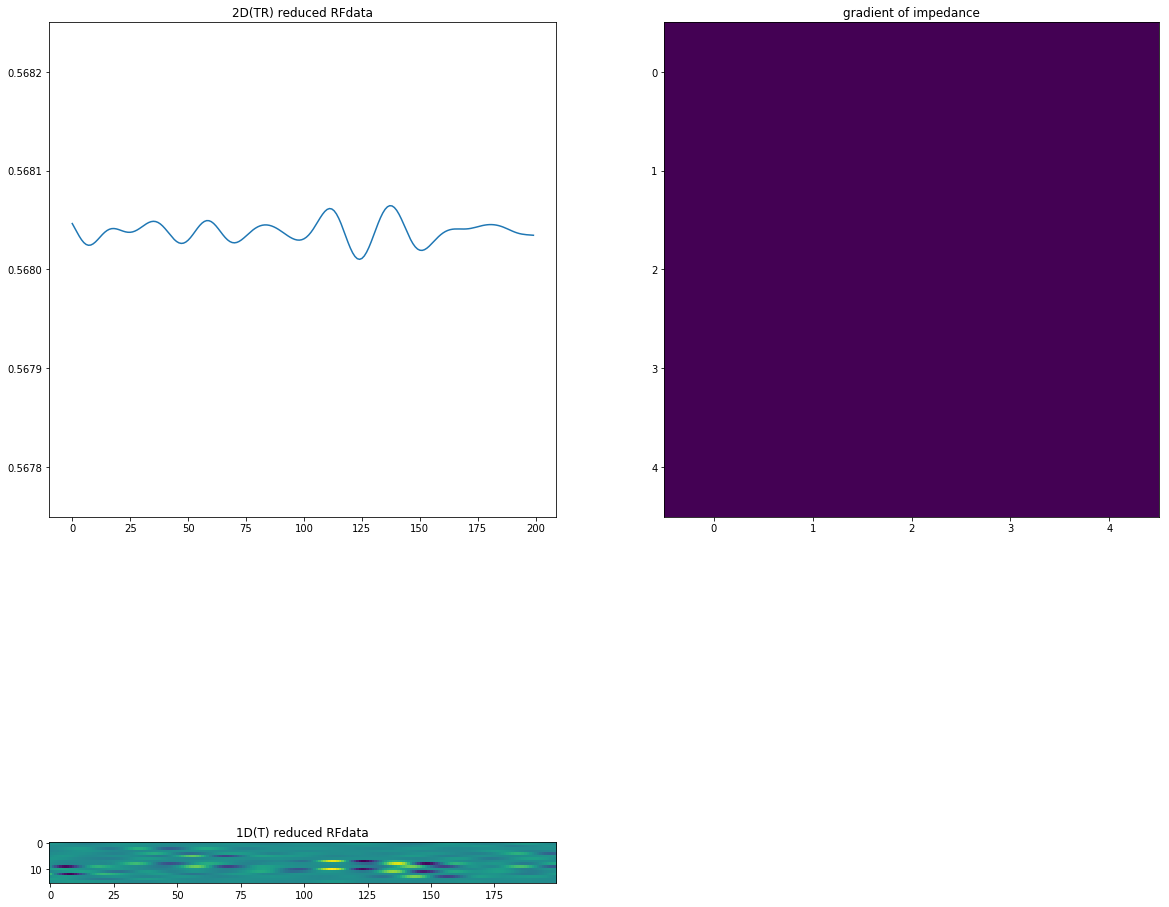

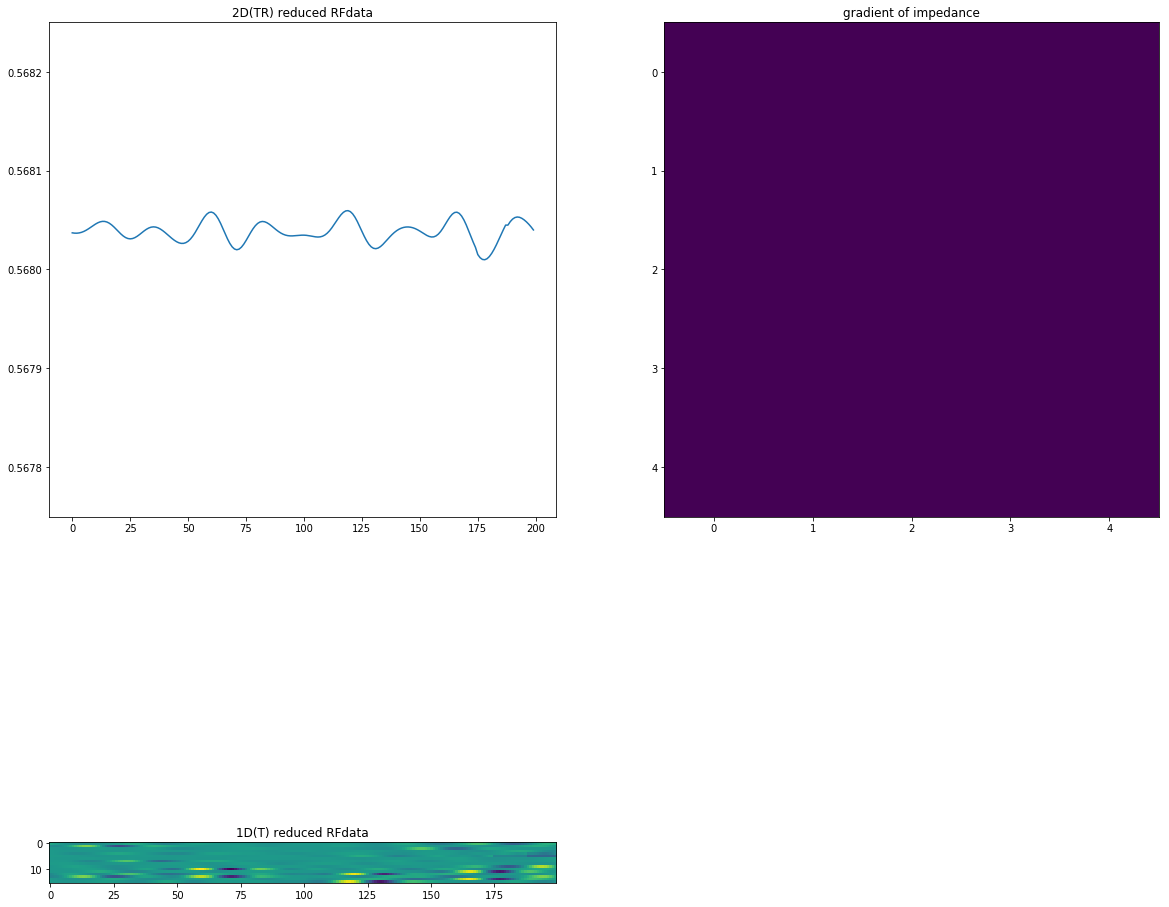

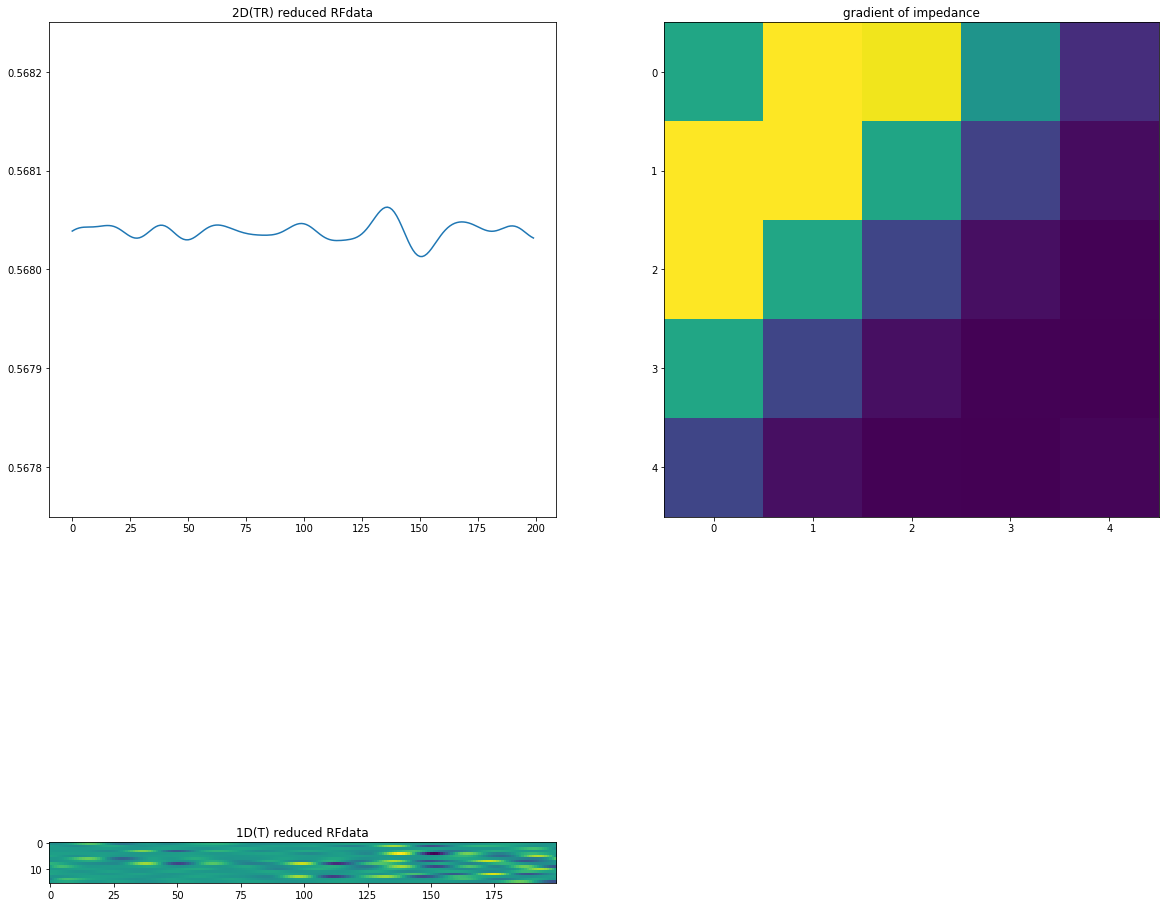

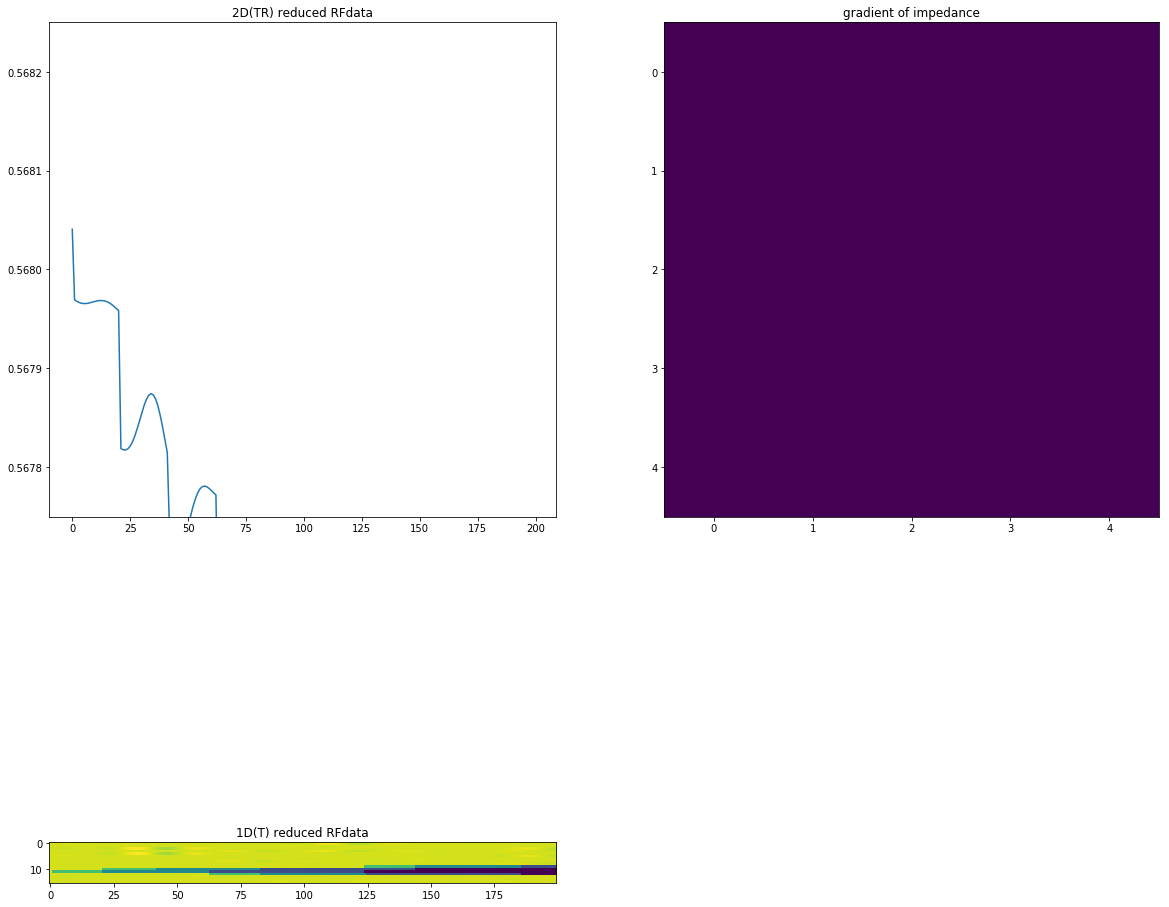

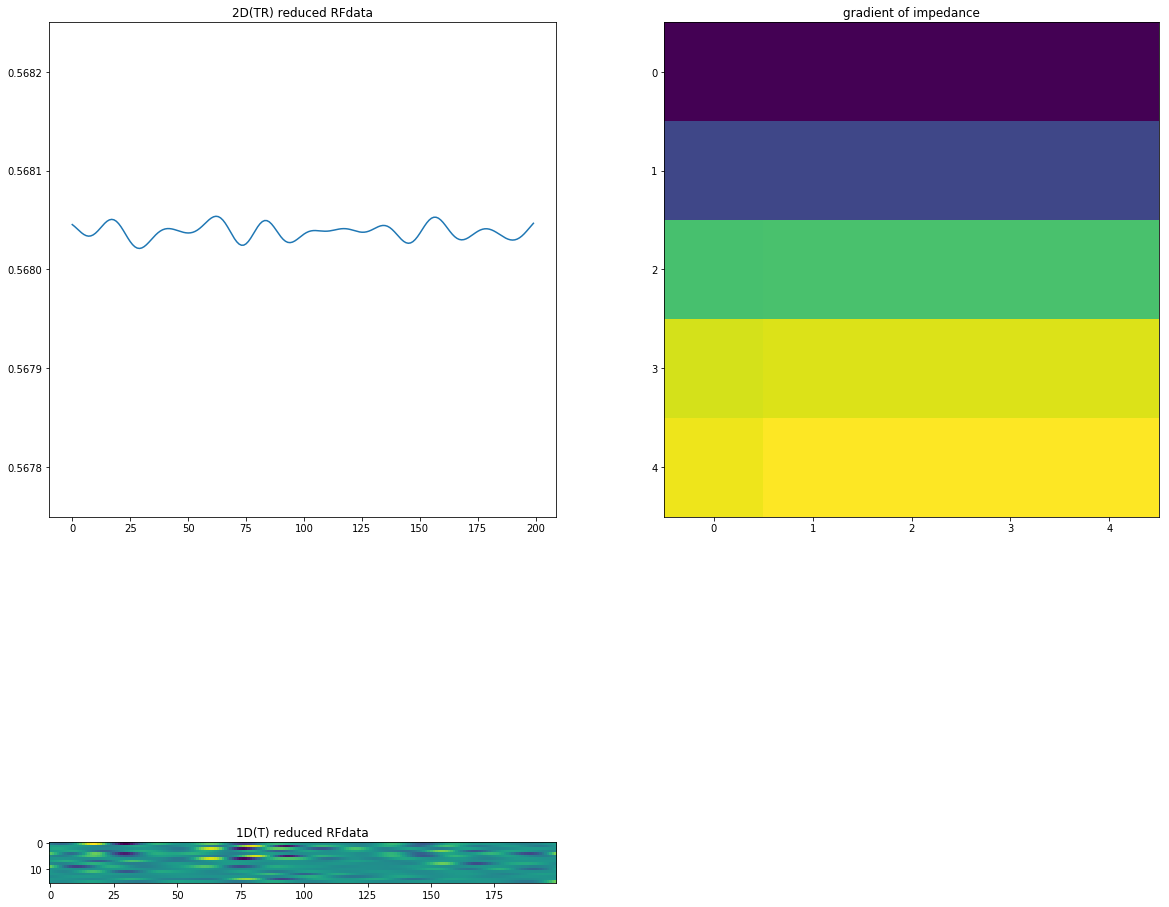

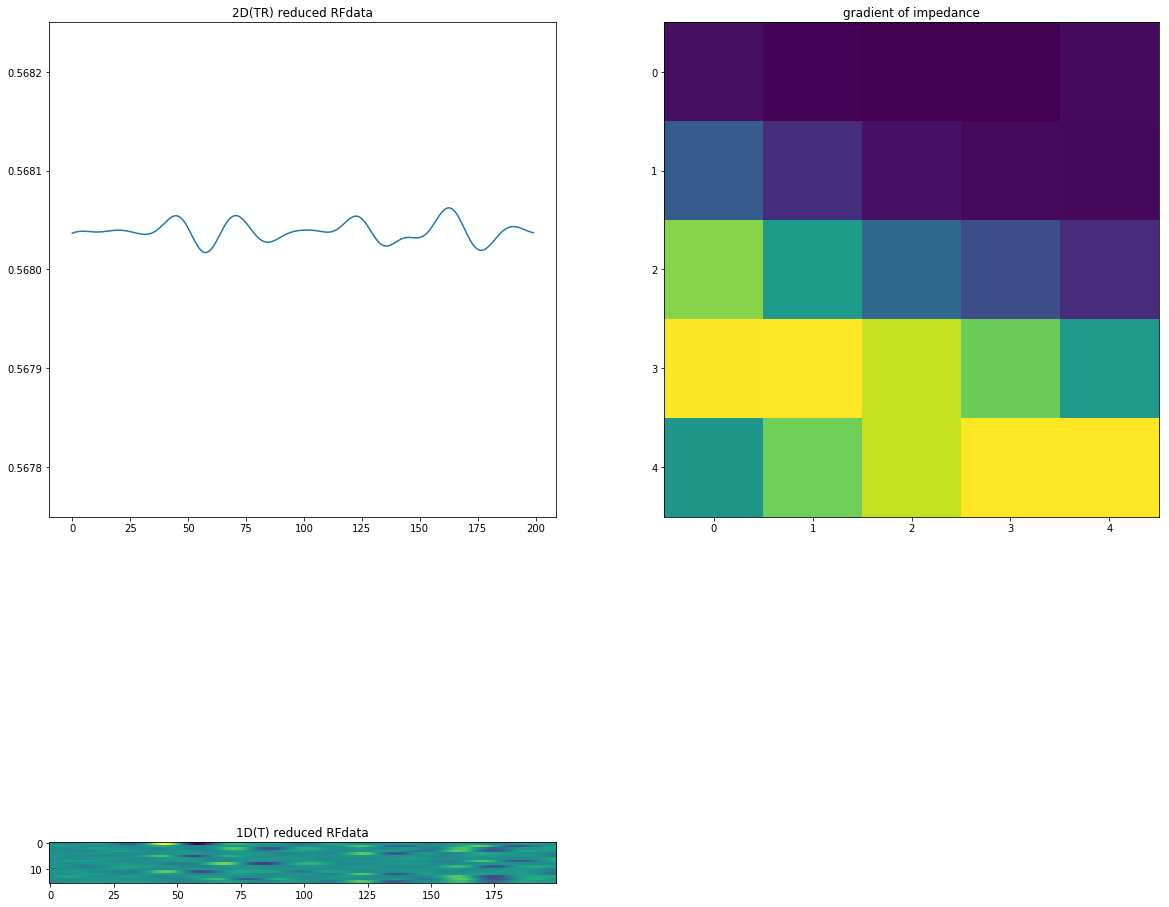

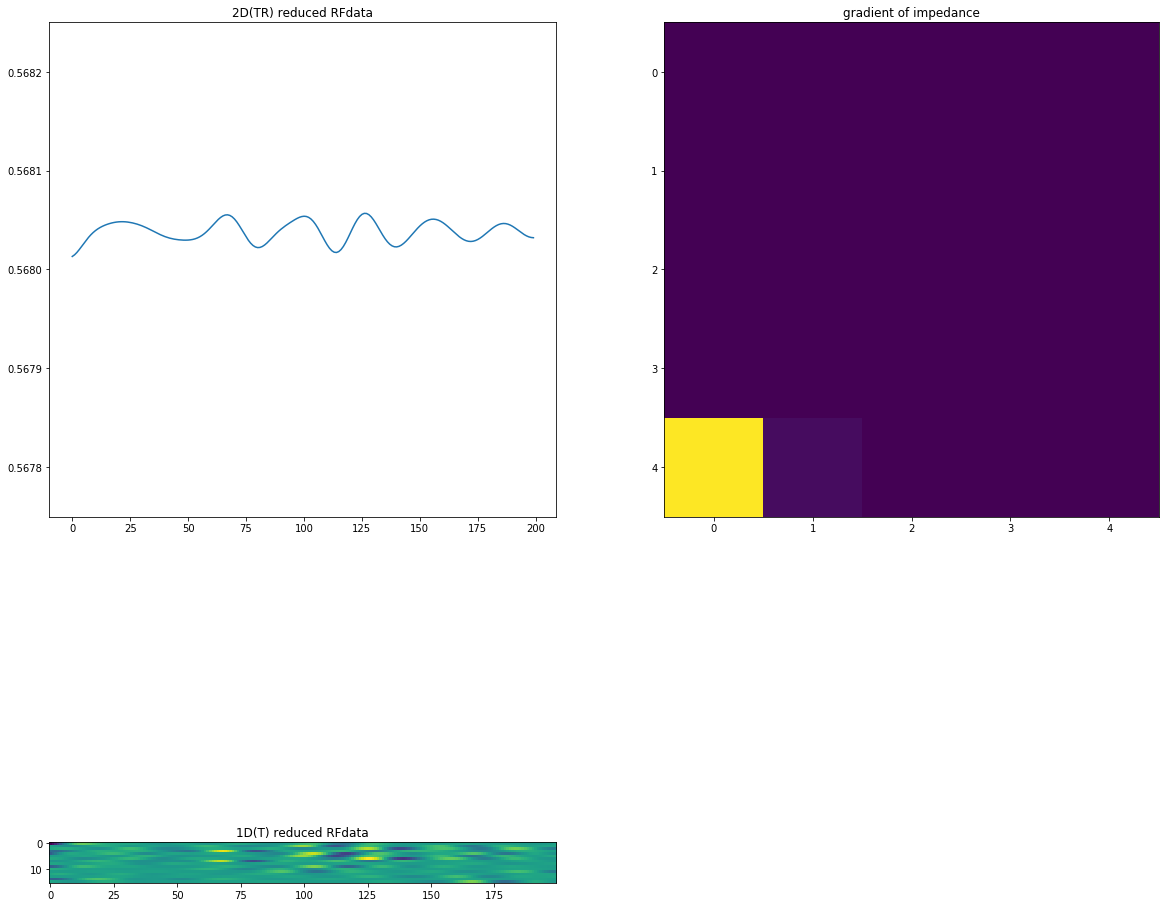

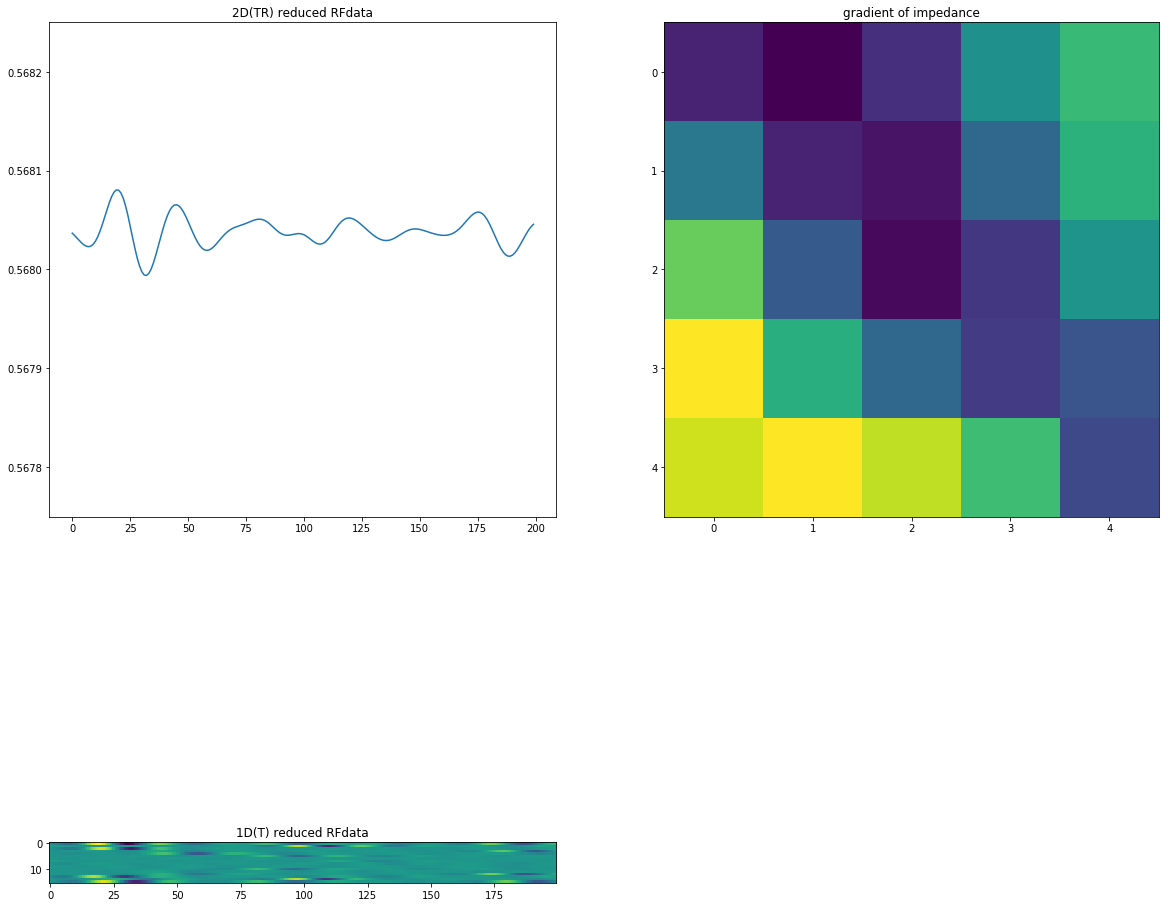

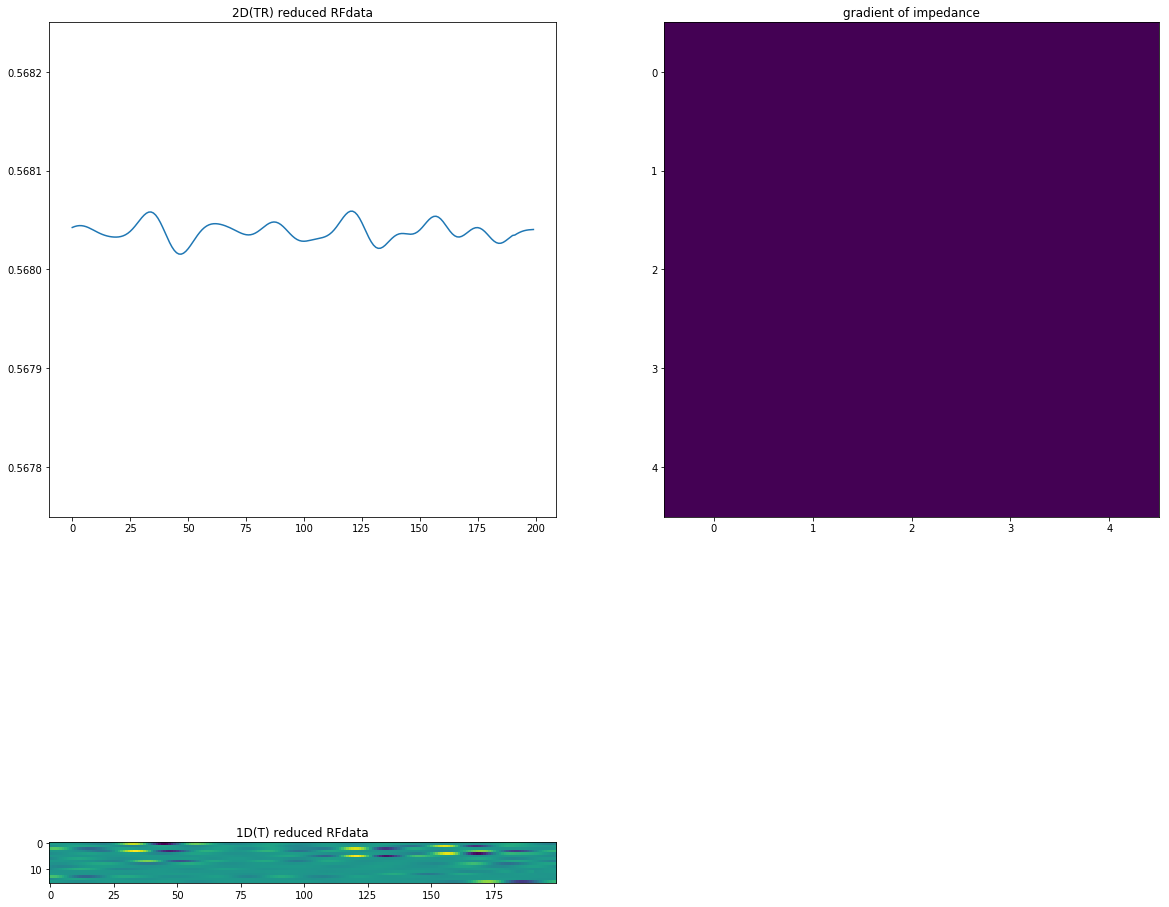

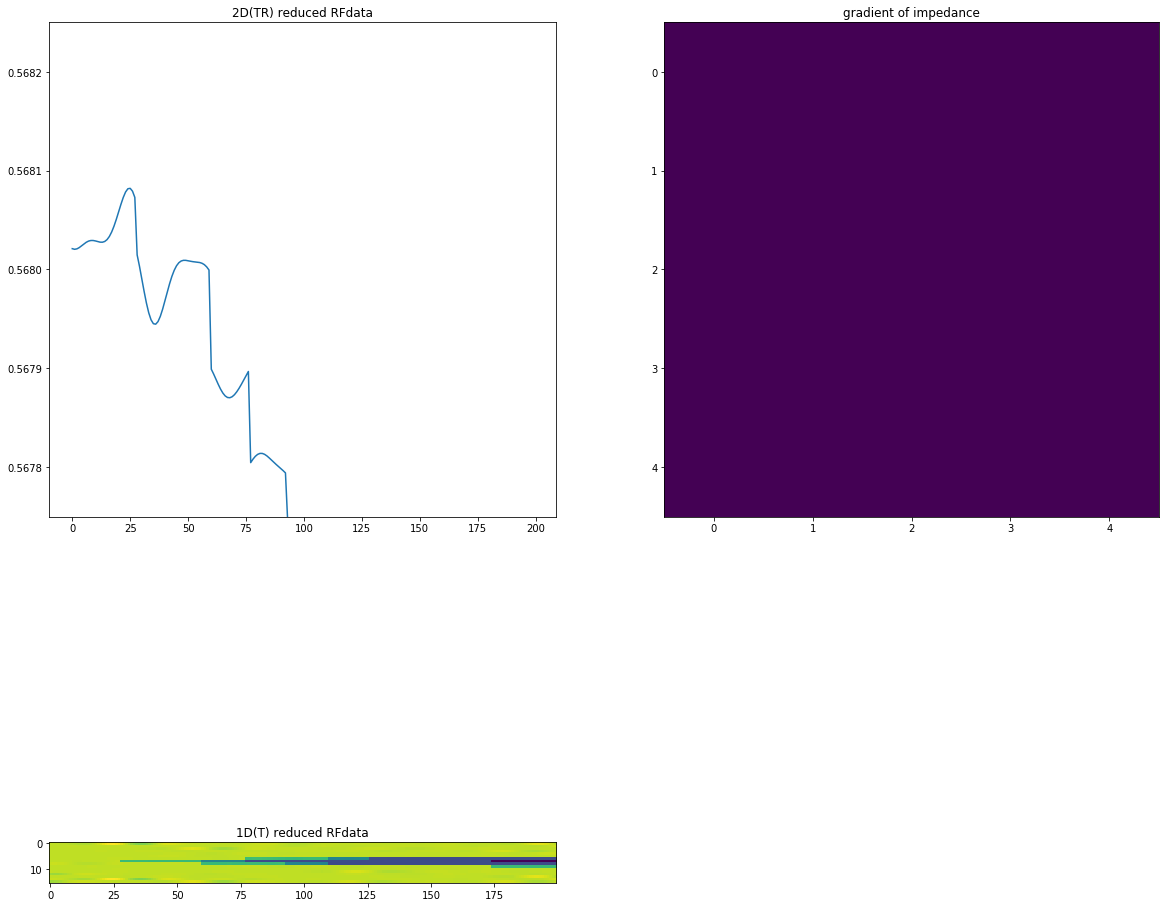

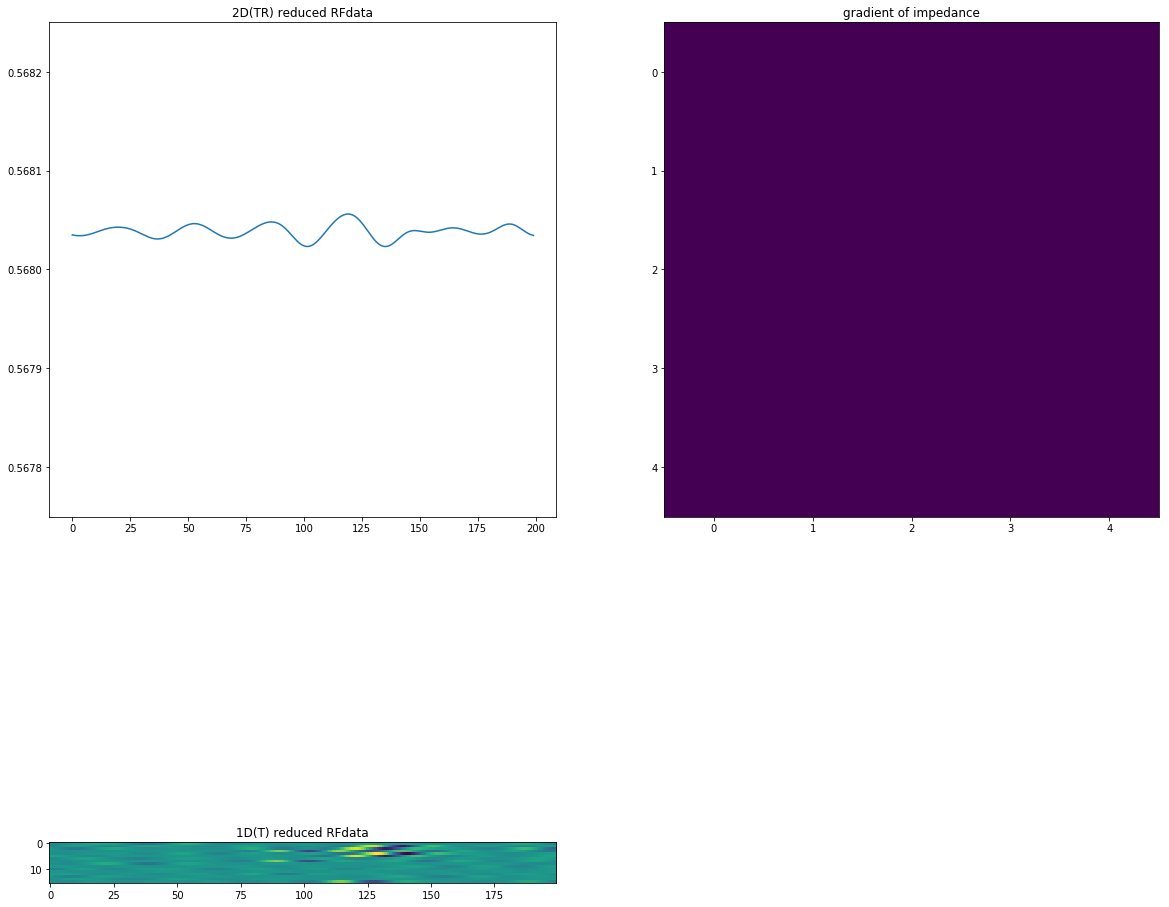

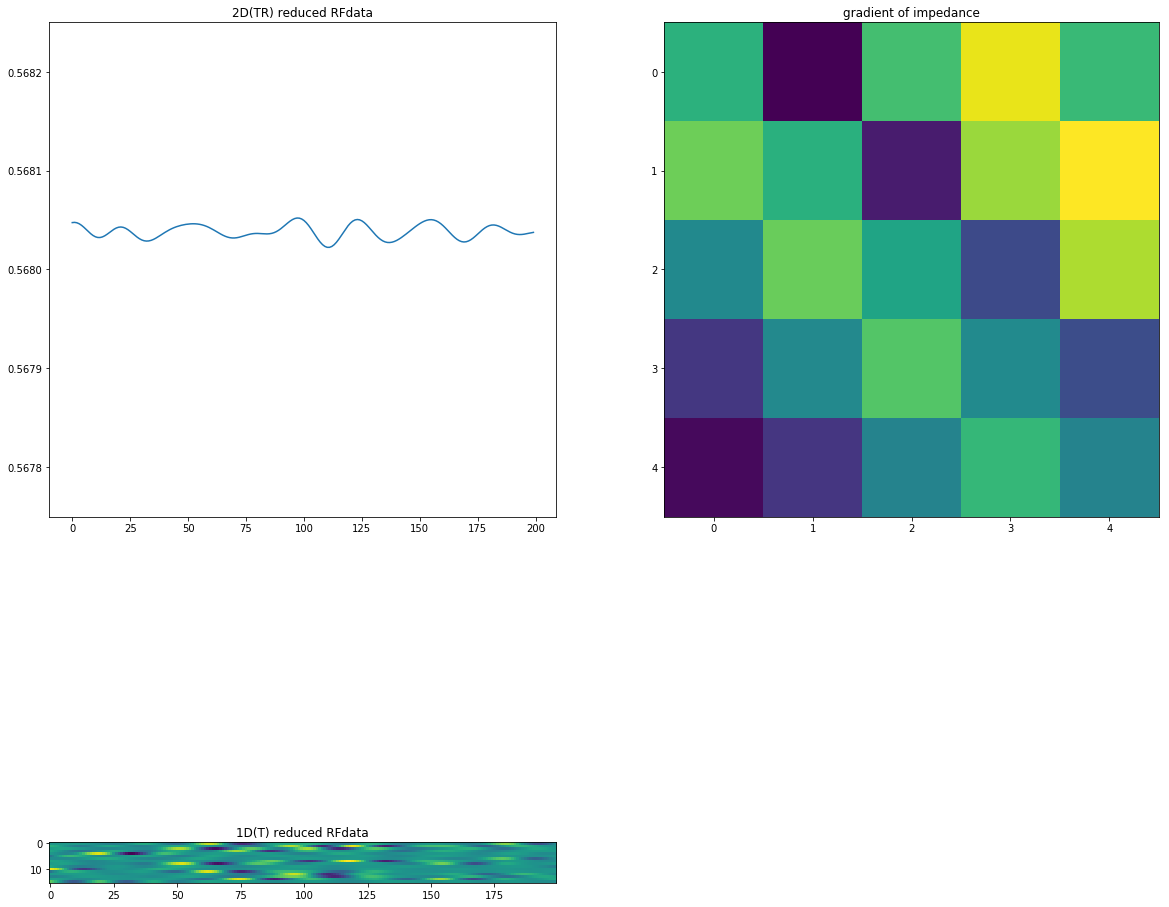

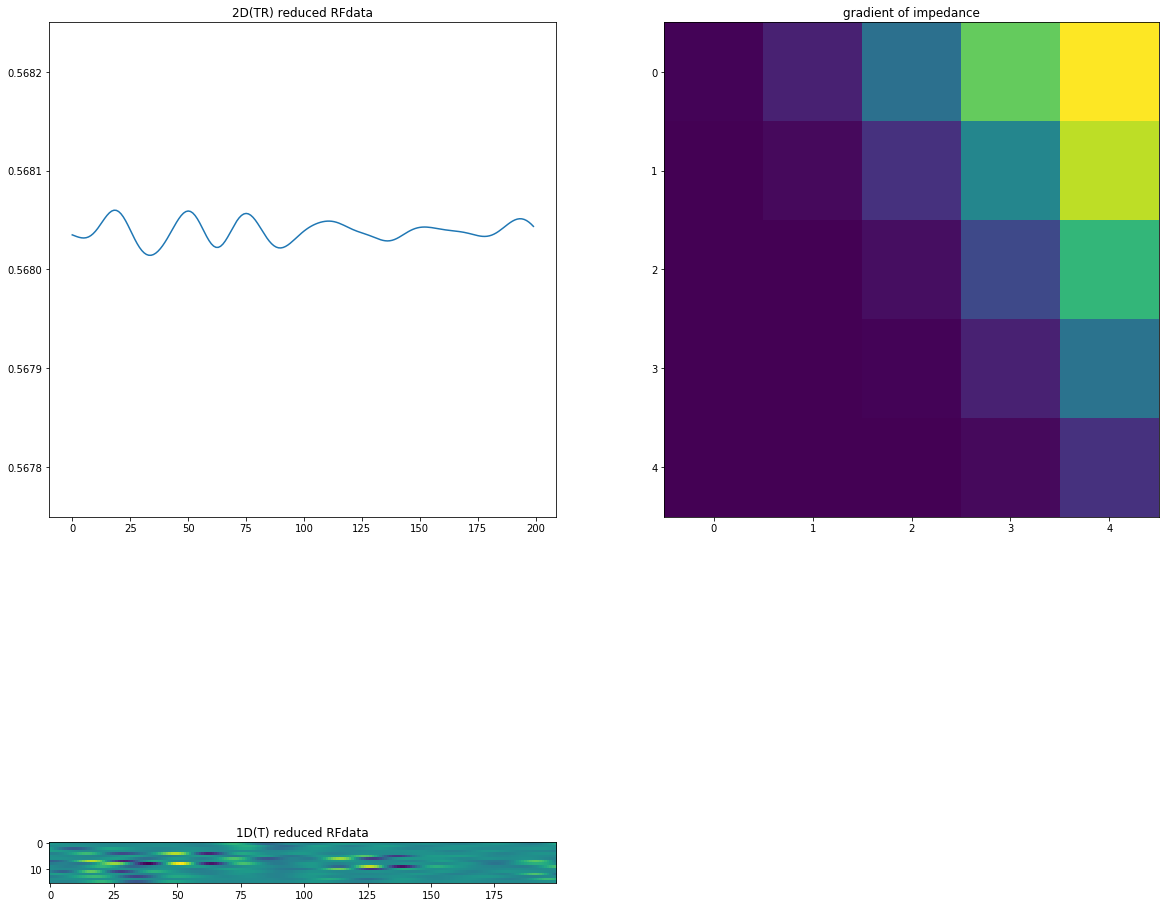

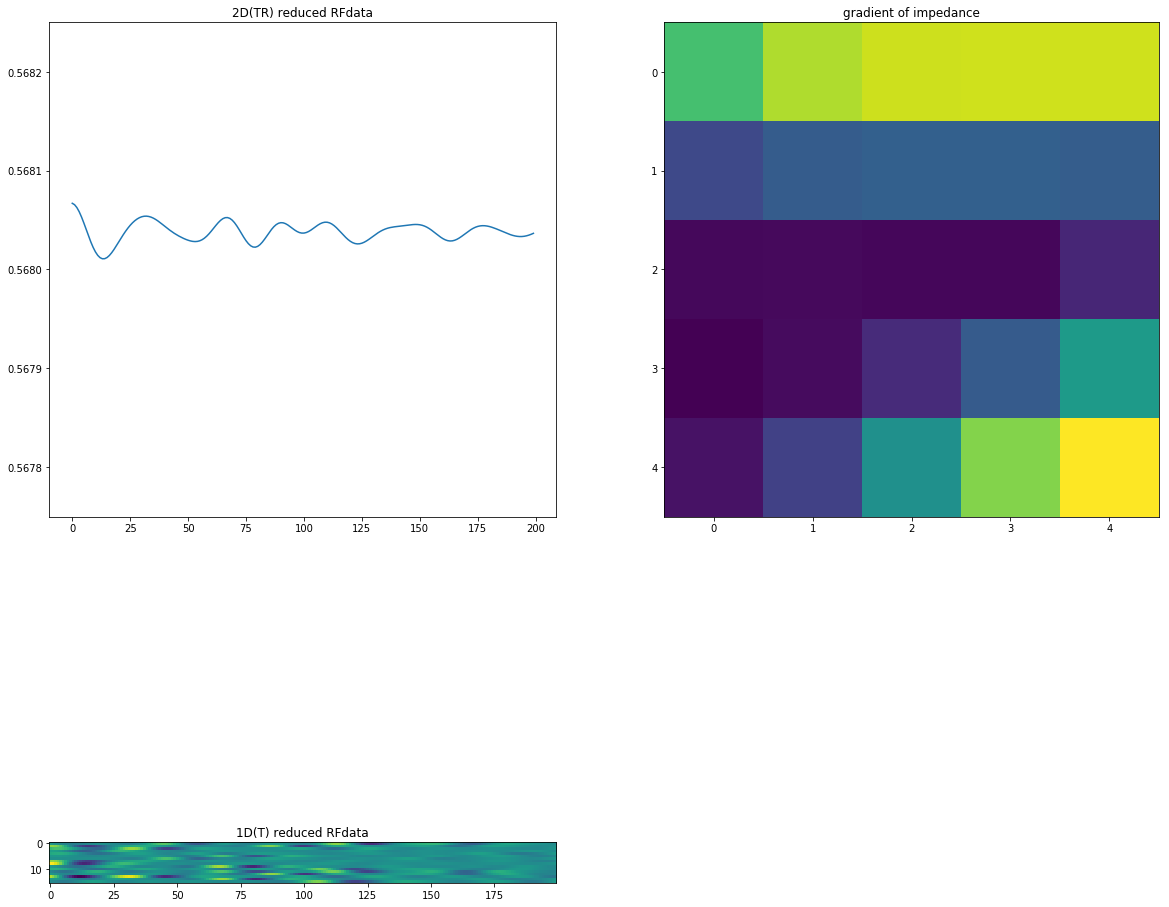

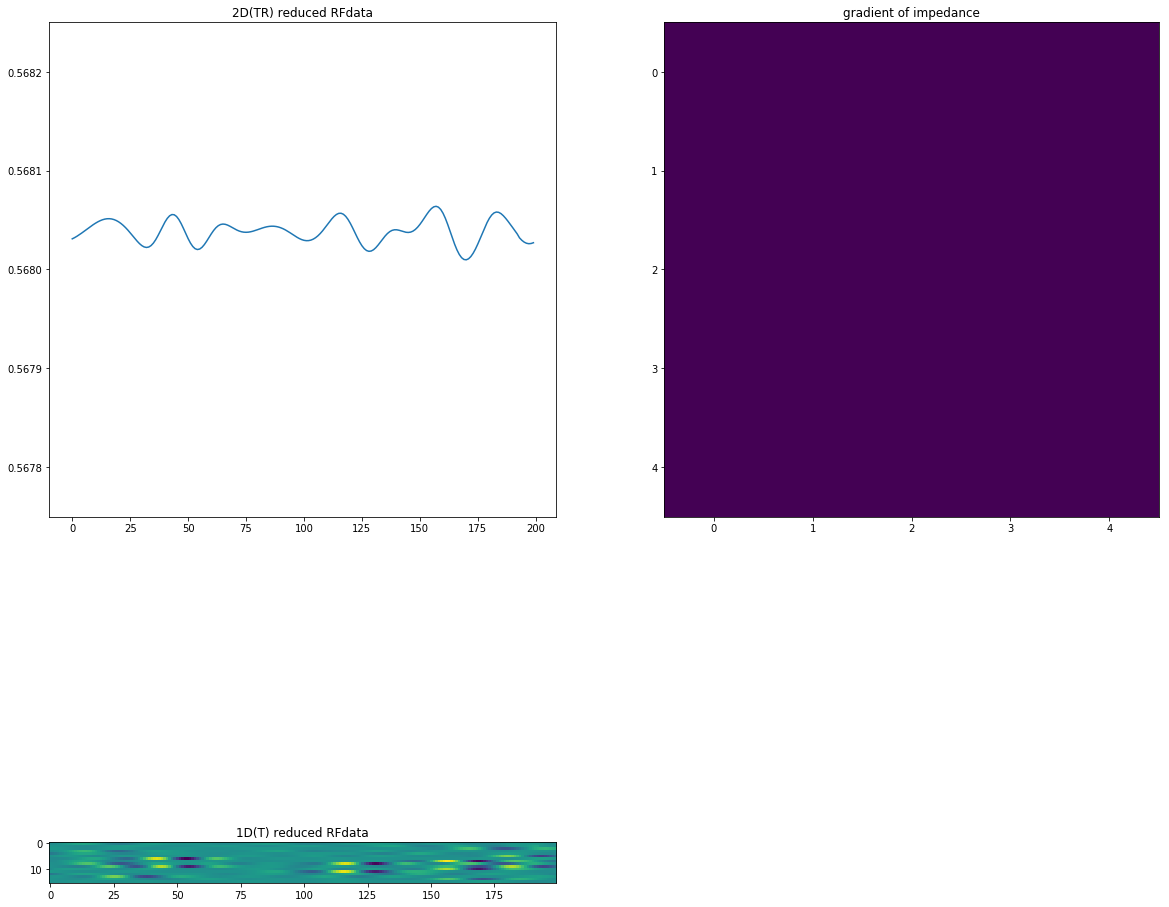

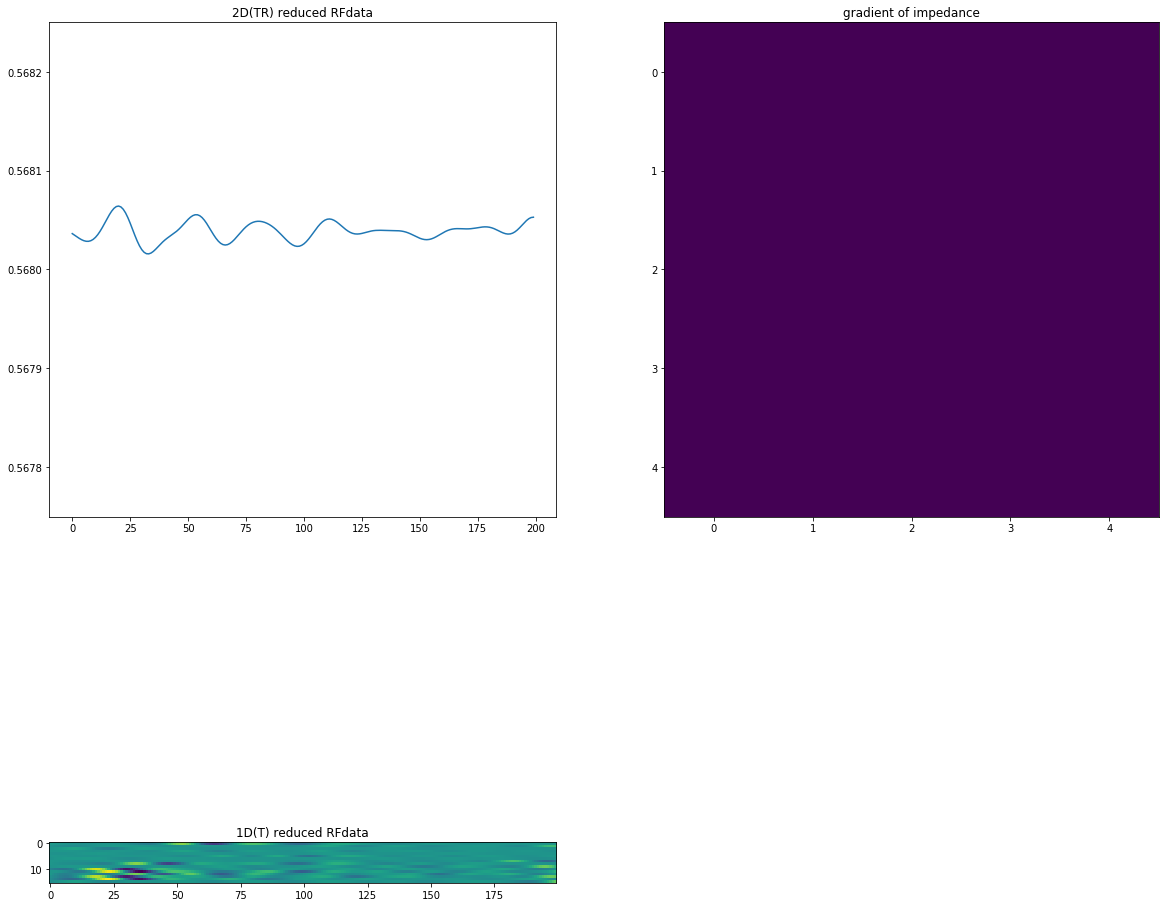

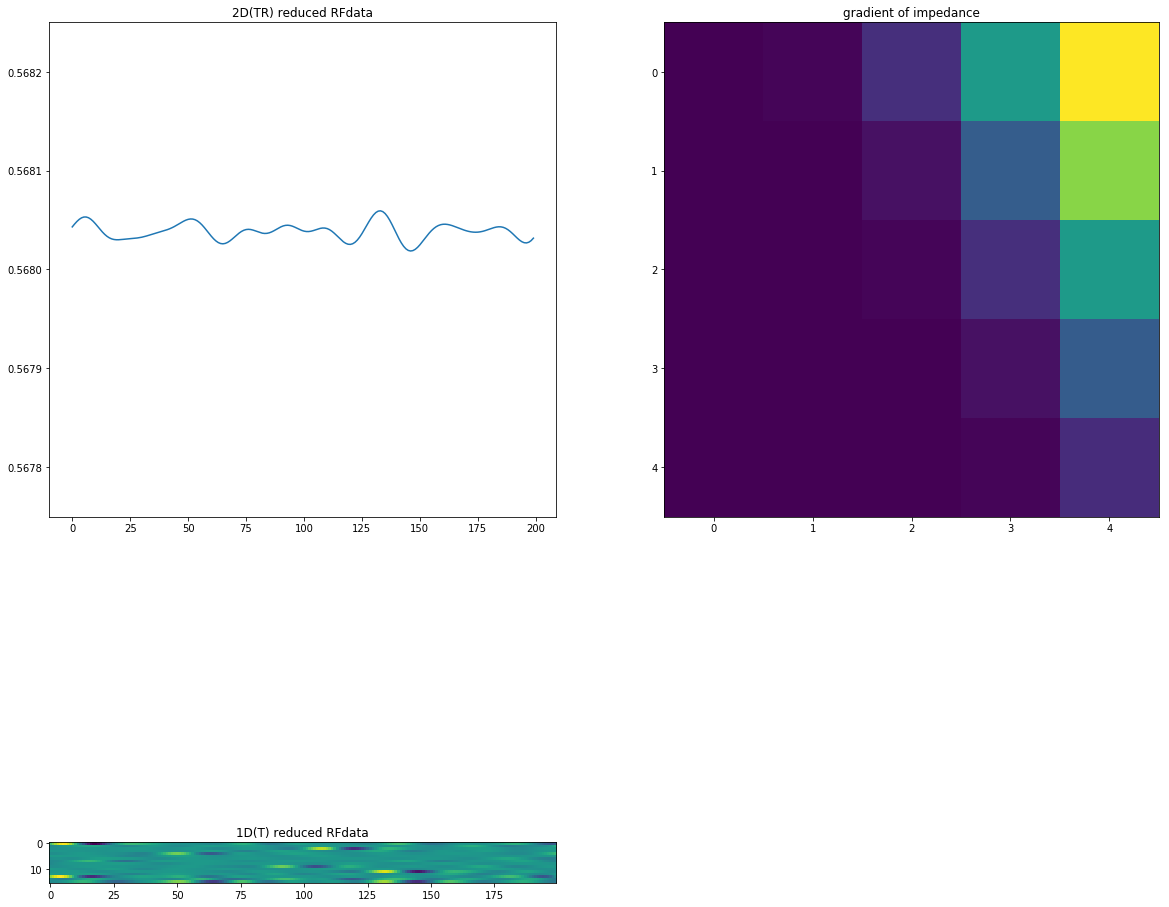

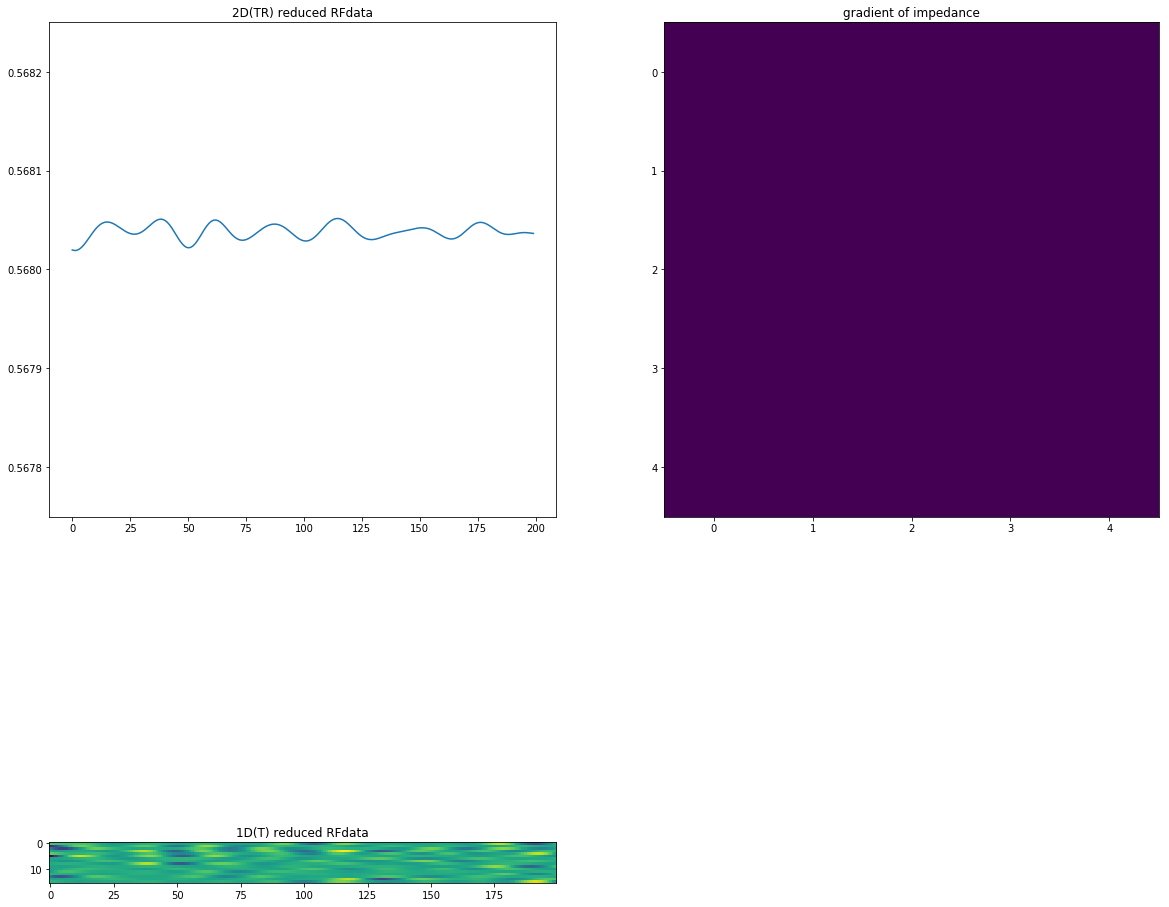

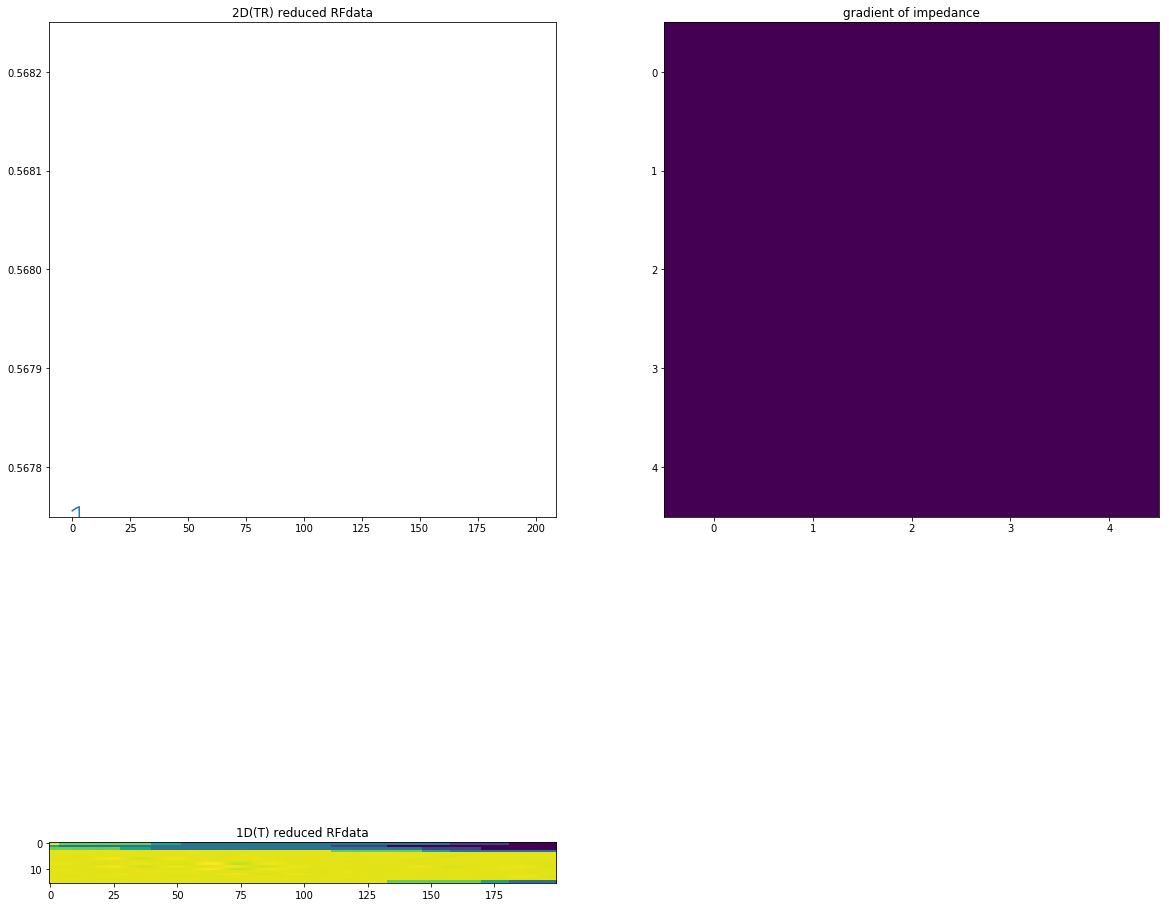

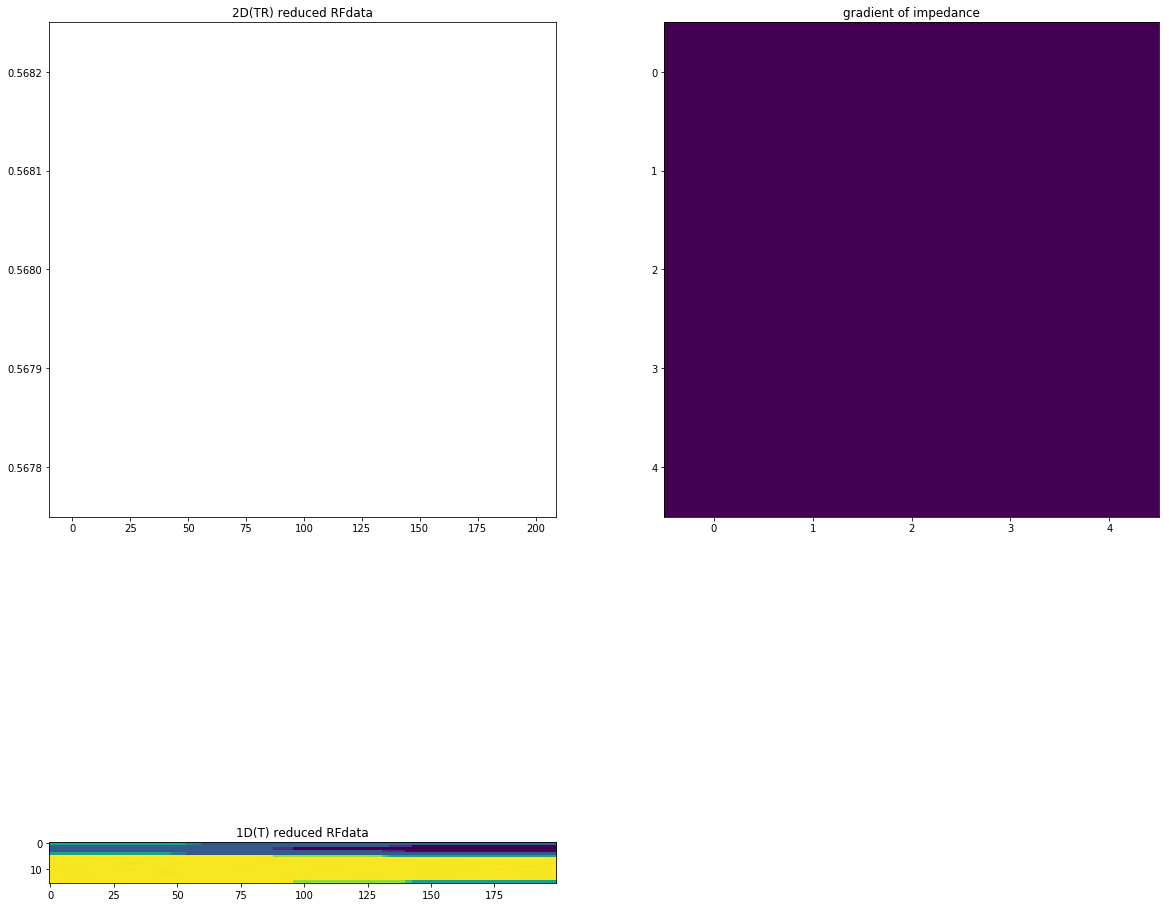

In [21]:
dir_save = os.path.join(dir_dataset, 'image')
if not os.path.exists(dir_save): os.makedirs(dir_save)

for i in range(30):
    
    input_sample = np.load(input_dataset[i])
    output_sample = np.load(output_dataset[i])
    
    input_sample = input_sample[:,::16,:]
    input_sample += (input_sample<np.mean(input_sample)*0.5) * np.mean(input_sample)    
    
    T, R, L = input_sample.shape
    
#     _vmax = input_sample.max()
#     _vmin = input_sample.min()
    _vmax = 0.56825
    _vmin = 0.56775

    
    plt.figure(figsize=(20,20))
    
    plt.subplot(2,2,1)
    plt.plot(np.mean(np.mean(input_sample, axis=0), axis=0))
    plt.ylim([_vmin, _vmax])
    plt.title('2D(TR) reduced RFdata')
    plt.subplot(2,2,2)
    plt.imshow(output_sample, interpolation='nearest')
    plt.title('gradient of impedance')
    plt.subplot(2,2,3)
    plt.imshow(np.mean(input_sample, axis=0), interpolation='nearest')
    plt.title('1D(T) reduced RFdata')

    plt.savefig(os.path.join(dir_save, '{0:0>8}.png'.format(i)))
    
        